# Tarissa Nurhapsari Laksono (202231086)

## TEPI DAN GARIS

In [1]:
#mengimport library
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

import skimage.io
import numpy as np
from skimage.feature import graycomatrix, graycoprops
from skimage import data
from skimage.color import rgb2hsv

In [2]:
#membaca gambar 
image = cv2.imread("2.jpg")

In [3]:
#menampilkan gambar
cv2.imshow("gambar parkir",image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [4]:
# Mengkonversi gambar ke grayscale
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

# Mendeteksi tepi menggunakan Canny edge detector
edges = cv2.Canny(image,100,150)

In [5]:
# Menampilkan gambar dengan tepi yang terdeteksi
cv2.imshow("gambar parkir",edges)
cv2.waitKey(0)
cv2.destroyAllWindows()

Text(0.5, 1.0, 'gambar yg terproses')

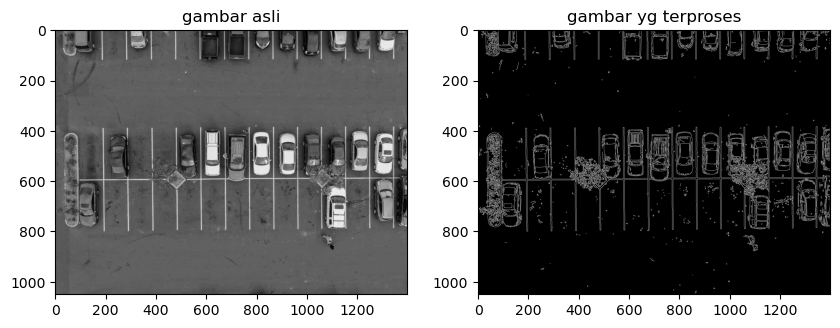

In [6]:
# Menampilkan gambar asli dan gambar dengan tepi yang terdeteksi berdampingan menggunakan matplotlib
fig,axs = plt.subplots(1,2,figsize = (10,10))
ax = axs.ravel()

ax[0].imshow(gray,cmap = "gray")
ax[0].set_title("gambar asli")

ax[1].imshow(edges,cmap = "gray")
ax[1].set_title("gambar yg terproses")

In [7]:
# Menerapkan Gaussian blur, Mendeteksi tepi lagi setelah blur, Mendeteksi garis menggunakan Hough Line Transform
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
edges = cv2.Canny(blurred, 50, 150, apertureSize=3)
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 50, minLineLength=50, maxLineGap=20)

In [8]:
# Menggambar garis pada gambar asli
image_line = image.copy()
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(image_line, (x1, y1), (x2, y2), (0, 255, 0), 2)

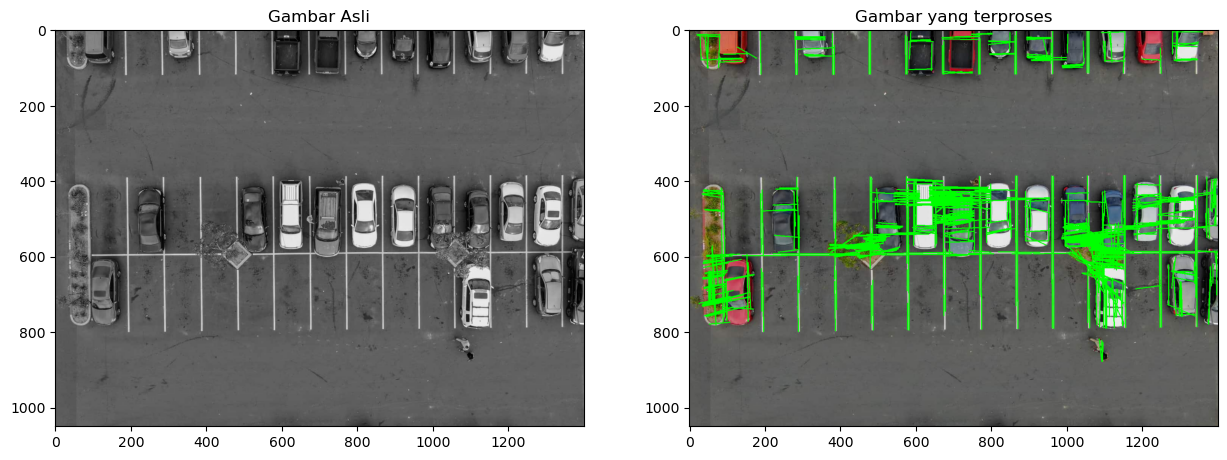

In [9]:
# Menampilkan gambar grayscale asli dan gambar dengan garis yang terdeteksi berdampingan menggunakan matplotlib
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
ax = axs.ravel()

ax[0].imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB), cmap='gray')
ax[0].set_title("Gambar Asli")

ax[1].imshow(cv2.cvtColor(image_line, cv2.COLOR_BGR2RGB))
ax[1].set_title("Gambar yang terproses")

plt.show()

# Ekstraksi Fitur 

Text(0.5, 1.0, 'HSV')

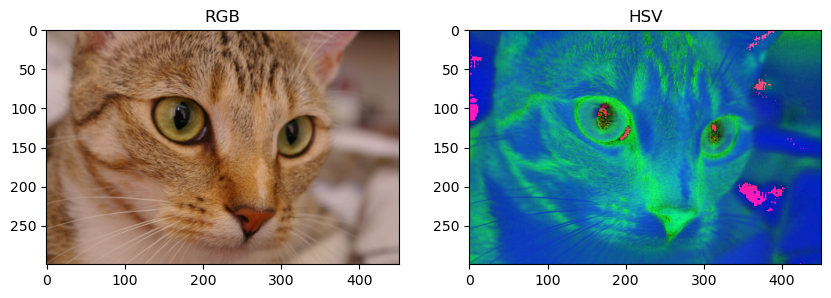

In [10]:
# Mengambil gambar dari skimage, Mengonversi gambar dari RGB ke HSV
img = skimage.data.chelsea ( )
img_hsv = rgb2hsv(img)

# Membuat subplot untuk menampilkan gambar
fig, axs = plt.subplots(1,2, figsize = (10,10))

ax = axs.ravel()

# Menampilkan gambar dalam format RGB
ax[0].imshow(img)
ax[0].set_title("RGB")

# # Menampilkan gambar dalam format HSV
ax[1].imshow(img_hsv, cmap="hsv")
ax[1].set_title("HSV")

In [11]:
# Menghitung nilai rata-rata dan standar deviasi dari gambar HSV
mean = np.mean(img_hsv.ravel())
std = np.std(img_hsv.ravel())

print(mean, std)

0.36188699949726055 0.2524016839437339


In [12]:
# menghitung glcm dan mengambil properti tekstur
v_channel = (img_hsv[:, :, 2] * 255).astype('uint8')
glcm = graycomatrix(v_channel, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)

In [13]:
contrast = graycoprops(glcm, 'contrast')
dissimilarity = graycoprops(glcm, 'dissimilarity')
homogeneity = graycoprops(glcm, 'homogeneity')
energy = graycoprops(glcm, 'energy')
correlation = graycoprops(glcm, 'correlation')
ASM = graycoprops(glcm, 'ASM')

In [14]:
print("Contrast:", contrast)
print("Dissimilarity:", dissimilarity)
print("Homogeneity:", homogeneity)
print("Energy:", energy)
print("Correlation:", correlation)
print("ASM:", ASM)

Contrast: [[82.59345926]]
Dissimilarity: [[5.46984444]]
Homogeneity: [[0.28080153]]
Energy: [[0.02807641]]
Correlation: [[0.96026241]]
ASM: [[0.00078828]]
